# Lab 2
#### (i finally got it working)

In [2]:
#chatgpt was asked "demonstrate how to load data in python using pandas
#importing necessary modules 
import numpy as np
import pandas as pd

#linking files from directory
wfpath = 'Data/NFDB_point_stats.csv'
co2path = 'Data/co2_mm_mlo.csv'

#cleaning up the data and putting it in dataframes
co2data = pd.read_csv(co2path,
                    delimiter=',', header= 26,
                    parse_dates=[[0,1]]
)

wfdata = pd.read_csv(wfpath,
                    delimiter=',',
                    header= 4,
                    #parse_dates=[0],
                    skipfooter= 3,
                    thousands=',',
                    skipinitialspace=1
)

#renaming column headers to be in line with graphs
wfdata.rename(columns={'YEAR':'Years', 'TOTAL_HA':'Area Burned', 'FIRES':'Number of Fires'}, inplace=True)
co2data.rename(columns={'year_month':'Year'}, inplace=True)

#reversing the data so it reads chronologically
wfdata = wfdata.iloc[::-1]

#Chat GPT was asked: please write a concise even number generator in python
#I then made changes
def yearxval(yr1, yr2):
    count = (yr2 - yr1)
    return [i for i in range(1, 1 + count, 2)]

C:\Users\asiab\AppData\Local\Temp\ipykernel_1944\498426468.py:16: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  wfdata = pd.read_csv(wfpath,


<AxesSubplot:title={'center':'Recent Monthly Mean CO₂ at Mauna Loa Observatory'}, xlabel='Year', ylabel='CO₂ mole fraction (ppm)'>

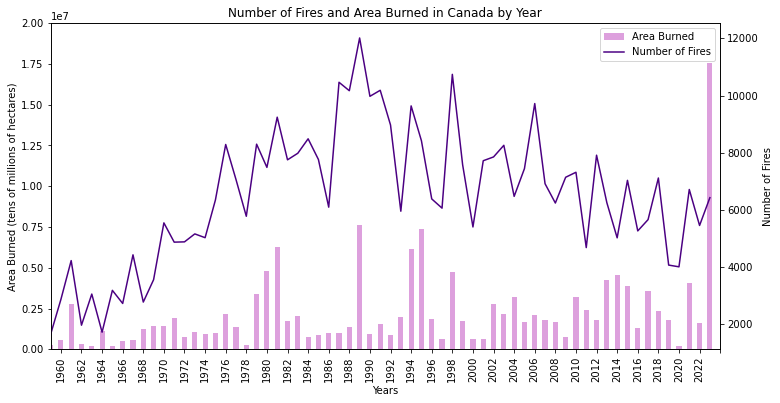

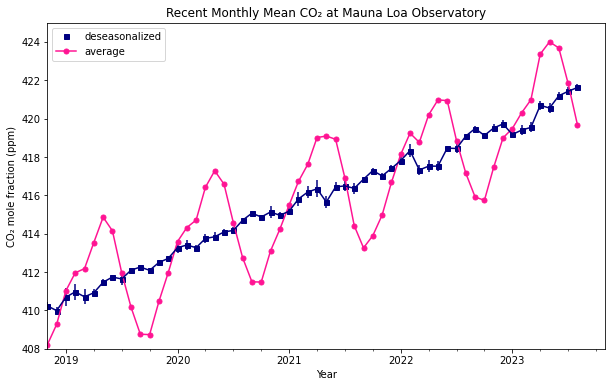

In [3]:
#plotting the wildfire graph
wfbar = wfdata.plot.bar(x = 'Years', y= 'Area Burned', color = 'plum',
                           rot=90, ylim= (0, 2e7)) #xticks = years(200, 900))
wfline = wfdata.plot.line(x = 'Years', y= 'Number of Fires', ylabel= 'Area Burned (tens of millions of hectares)',
                         c='indigo',
                           figsize= (12, 6), rot=90, title= 'Number of Fires and Area Burned in Canada by Year',
                        secondary_y=True, sharex= 1, ax = wfbar, use_index=False,
                         mark_right= False, xlim= (0,65), xticks = yearxval(1958, 2023)
                         )
wfbar.right_ax.set_ylabel('Number of Fires')

#plotting the co2 graph
co2err = co2data.plot.line(figsize = (10,6), x= 'Year', y= 'deseasonalized', c ='navy', ms = 5, yerr= 'unc', legend = False)
co2dses = co2data.plot.line(figsize = (10,6), x= 'Year', y= 'deseasonalized', c ='navy', ms = 5, style = 's', ax = co2err)
co2data.plot.line(x = 'Year', y= 'average', c = 'deeppink', style= '-o', ms = 5,
                 title= 'Recent Monthly Mean CO₂ at Mauna Loa Observatory', ylabel= 'CO₂ mole fraction (ppm)',
                    ax = co2dses, xlim = (586, 646), ylim=(408, 425)
                   )

<function matplotlib.pyplot.show(close=None, block=None)>

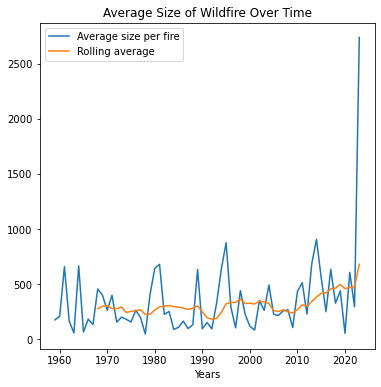

In [4]:
import matplotlib.pyplot as plt

#part 3
#average fire size
#objective: plot the total hectares by number of fires

numfir = wfdata['Number of Fires']
habur = wfdata['Area Burned']

#addind new stat (hectares total by number of fires)
firesize = habur/numfir
wfdata['Average size per fire'] = firesize

wfdata['Rolling average'] = wfdata['Average size per fire'].rolling(10).mean()

#plotting the lines
#ax1 = plt.plot(wfdata['Years'],wfdata['newstat'])
#ax2 = plt.plot(wfdata['Years'],wfdata['rolling'])
#title =''
#plt.show


#plotting
ax1 = wfdata.plot.line(x='Years', y= 'Average size per fire',
                     figsize= (6,6), title = 'Average Size of Wildfire Over Time' 
                     ) 
ax2 = wfdata.plot.line(x='Years', y='Rolling average', ax= ax1)
plt.show

<AxesSubplot:title={'center':'Recent Monthly Mean CO₂ at Mauna Loa Observatory'}, xlabel='Year', ylabel='CO₂ mole fraction (ppm)'>

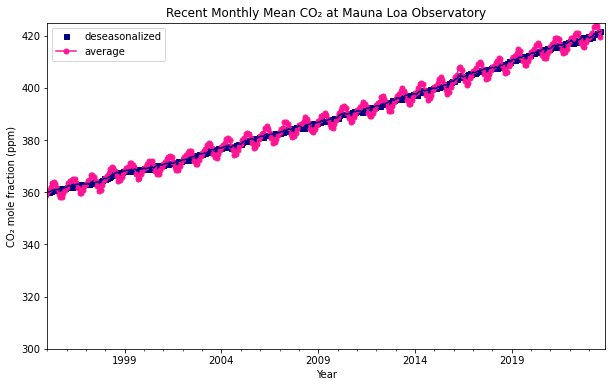

In [5]:
#plotting the co2 graph
co2err = co2data.plot.line(figsize = (10,6), x= 'Year', y= 'deseasonalized', c ='navy', ms = 5, yerr= 'unc', legend = False)
co2dses = co2data.plot.line(figsize = (10,6), x= 'Year', y= 'deseasonalized', c ='navy', ms = 5, style = 's', ax = co2err)
co2data.plot.line(x = 'Year', y= 'average', c = 'deeppink', style= '-o', ms = 5,
                 title= 'Recent Monthly Mean CO₂ at Mauna Loa Observatory', ylabel= 'CO₂ mole fraction (ppm)',
                    ax = co2dses, xlim = (300, 646), ylim=(300, 425)
                   )

In [6]:
#annual increase in co2

yearsort = co2data.groupby(co2data['Year']).mean
incyear = yearsort['average'].mean()
print(incyear)
co2data.groupby('Year')['average'].mean()




TypeError: 'method' object is not subscriptable

          Year  decimal date  average  deseasonalized  ndays  sdev   unc  \
0   1958-03-01     1958.2027   315.70          314.43     -1 -9.99 -0.99   
1   1958-04-01     1958.2877   317.45          315.16     -1 -9.99 -0.99   
2   1958-05-01     1958.3699   317.51          314.71     -1 -9.99 -0.99   
3   1958-06-01     1958.4548   317.24          315.14     -1 -9.99 -0.99   
4   1958-07-01     1958.5370   315.86          315.18     -1 -9.99 -0.99   
..         ...           ...      ...             ...    ...   ...   ...   
781 2023-04-01     2023.2917   423.36          420.69     28  0.60  0.22   
782 2023-05-01     2023.3750   424.00          420.55     31  0.69  0.24   
783 2023-06-01     2023.4583   423.68          421.19     29  0.57  0.20   
784 2023-07-01     2023.5417   421.83          421.42     21  0.48  0.20   
785 2023-08-01     2023.6250   419.68          421.62     21  0.46  0.19   

     year  yearly_average  
0    1958       315.23200  
1    1958       315.23200  
2  

<AxesSubplot:xlabel='Year'>

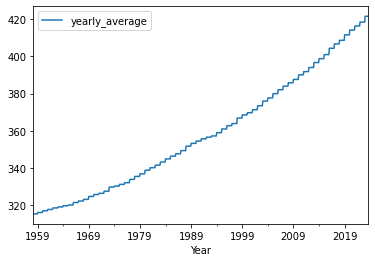

In [16]:


#hello. I'm working with a dataframe called 'Year' with dates in a datetime format. I would like to take the yearly average of values in a column called 'average' and return those as a new column in the dataframe called "yearly average". 
df = pd.DataFrame(co2data)

# Extract the year from the 'Date' column
df['year'] = df['Year'].dt.year

# Calculate the yearly average of 'average'
yearly_average = df.groupby('year')['average'].mean().reset_index()

# Merge the yearly averages back to the original DataFrame
df = pd.merge(df, yearly_average, on='year', how='left', suffixes=('', '_yearly_average'))

# Rename the new column
df = df.rename(columns={'average_yearly_average': 'yearly_average'})

# Display the result
print(df)

df.plot.line(x = 'Year', y= 'yearly_average')

   average    areaburn
0   315.70  17577396.0
1   317.45   1610216.0
2   317.51   4078897.0


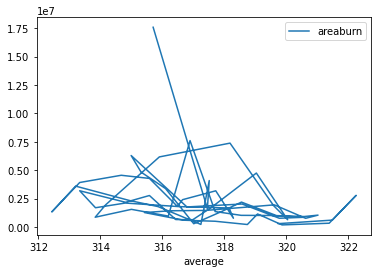

In [ ]:
#compare the annual increase in burn area against co2 


bothdata = pd.DataFrame(co2data['average'],)
bothdata['areaburn']=wfdata['Area Burned']


bothdata.plot.line(x= 'average', y= 'areaburn' )

print(bothdata.head(3))




        Date  average  year  yearly_average  yearly_increase
0 2020-01-01       10  2020            12.5              NaN
1 2020-01-02       15  2020            12.5              0.0
2 2021-01-01       20  2021            22.5             10.0
3 2021-01-02       25  2021            22.5              0.0


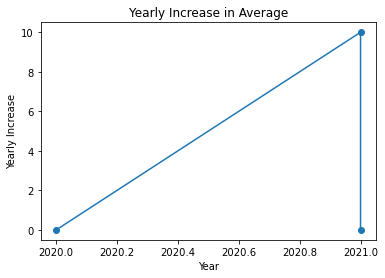

In [17]:
#Chat GPT was prompted: i would like to plot the amount the average increases per year. I want to add a new column called yearly increase

import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Example DataFrame creation (replace this with your actual data loading)
data = {'Date': ['2020-01-01', '2020-01-02', '2021-01-01', '2021-01-02'],
        'average': [10, 15, 20, 25]}

df = pd.DataFrame(data)

# Convert the 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Extract the year from the 'Date' column
df['year'] = df['Date'].dt.year

# Calculate the yearly average of 'average'
yearly_average = df.groupby('year')['average'].mean().reset_index()

# Merge the yearly averages back to the original DataFrame
df = pd.merge(df, yearly_average, on='year', how='left', suffixes=('', '_yearly_average'))

# Rename the new column
df = df.rename(columns={'average_yearly_average': 'yearly_average'})

# Calculate the yearly increase
df['yearly_increase'] = df['yearly_average'].diff()

# Display the result
print(df)

# Plotting
plt.plot(df['year'], df['yearly_increase'], marker='o')
plt.xlabel('Year')
plt.ylabel('Yearly Increase')
plt.title('Yearly Increase in Average')
plt.show()